In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/tinder-google-play-store-review/tinder_google_play_reviews.csv


/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
data = pd.read_csv("/kaggle/input/tinder-google-play-store-review/tinder_google_play_reviews.csv")
print(data.head())

                               reviewId                 userName  \
0  d5334a07-c527-457a-9f57-9ab375f26bbd           Trevor Carlson   
1  fbe447a6-eca4-4bf6-9297-b906f910bd6c             Chris Würsch   
2  4ca789a4-c6a6-4f5e-91a3-3fc7913c507c             Mike Robison   
3  9a249409-44d3-4e4e-9142-e91deac71494  Thai Ngan (Gai Nhà Mèo)   
4  2db65e89-68f3-44d0-b770-4950bdab878d         Ryan Jacob Leppo   

                                           userImage  \
0  https://play-lh.googleusercontent.com/a/AGNmyx...   
1  https://play-lh.googleusercontent.com/a/AGNmyx...   
2  https://play-lh.googleusercontent.com/a/AGNmyx...   
3  https://play-lh.googleusercontent.com/a-/ACB-R...   
4  https://play-lh.googleusercontent.com/a-/ACB-R...   

                                             content  score  thumbsUpCount  \
0  Most people don't answer you, and now Tinder h...      1              0   
1  Used to be okay, absolute garbage-tier app now...      1              0   
2                not

In [3]:
data.isnull().sum()
data = data[["content"]]

In [4]:
data = data.dropna()

In [5]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["content"] = data["content"].apply(clean)

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


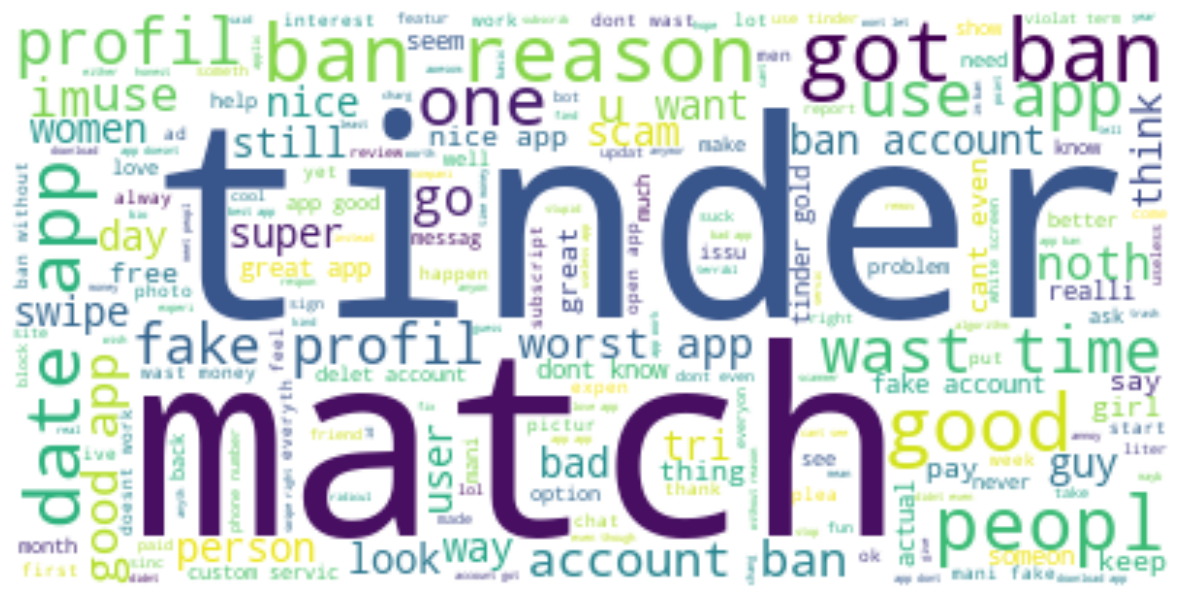

In [6]:
text = " ".join(i for i in data.content)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [7]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["content"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["content"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["content"]]
data = data[["content", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
                                             content  Positive  Negative  \
0  peopl dont answer tinder make harder get match...     0.000     0.146   
1  use okay absolut garbageti app everyth design ...     0.125     0.171   
2                              user friend fair male     0.733     0.000   
3  trash app purchas tinder plus never match anyo...     0.000     0.000   
4                                  limit like expens     0.556     0.000   

   Neutral  
0    0.854  
1    0.704  
2    0.267  
3    1.000  
4    0.444  


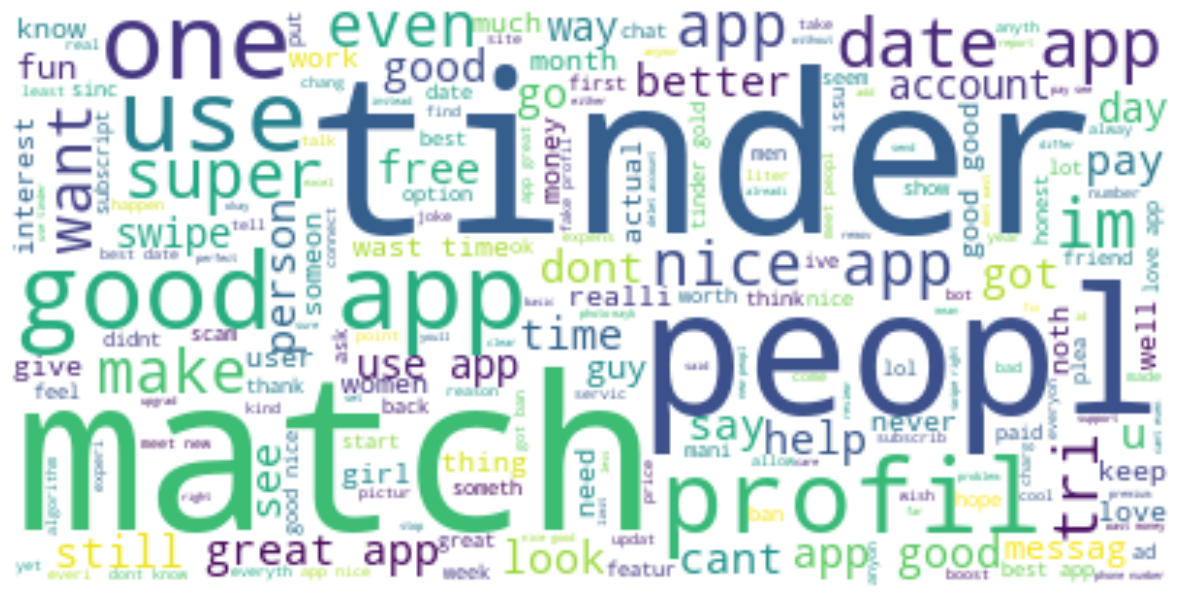

In [8]:
positive =' '.join([i for i in data['content'][data['Positive'] > data["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

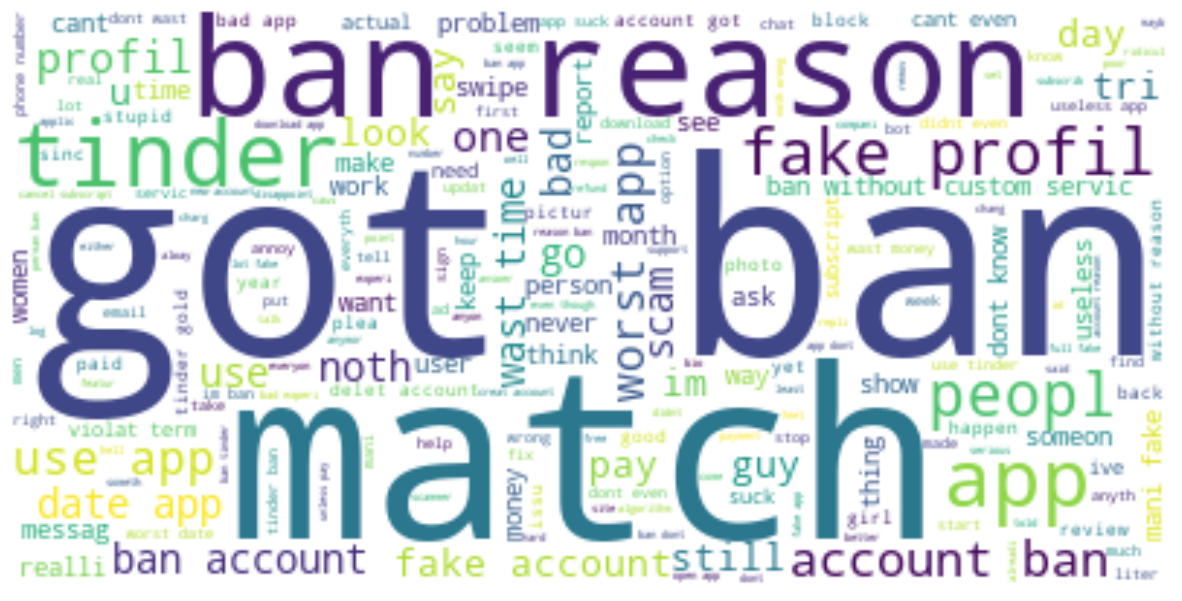

In [9]:
negative =' '.join([i for i in data['content'][data['Negative'] > data["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [10]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 


In [11]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  26559.930999999156
Negative:  17296.754999999855
Neutral:  65061.39100000873


the positive is much more than the negative, we can say that most users are happy with Tinder.